# NIVELL 1

## Ex 1: Una variable numèrica.

In [342]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

Conexión a mysql:

In [80]:
db = mysql.connector.connect(host = "localhost", username = "root", password = "123Frans", database = "sprint4")

Query de Mysql:

In [242]:
df_1 = pd.read_sql("""SELECT *
                 FROM transactions
                 JOIN companies ON companies.company_id = transactions.business_id""", con=db)

/var/folders/xm/w_wtz2nx3y537p9s_f9kdlqm0000gn/T/ipykernel_28018/45592607.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql("""SELECT *


Comprobación del type:

In [243]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            587 non-null    object 
 1   card_id       587 non-null    object 
 2   business_id   587 non-null    object 
 3   timestamp     587 non-null    object 
 4   amount        587 non-null    float64
 5   declined      587 non-null    int64  
 6   product_ids   587 non-null    object 
 7   user_id       587 non-null    int64  
 8   lat           587 non-null    float64
 9   longitude     587 non-null    float64
 10  company_id    587 non-null    object 
 11  company_name  587 non-null    object 
 12  phone         587 non-null    object 
 13  email         587 non-null    object 
 14  country       587 non-null    object 
 15  website       587 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 73.5+ KB


Creación del gráfico.
1. Usamos df_1, cantidad de bins=80, color de las bins=black, color de contorno=grey.
2. Titulo de la tabla.
3. Titulo del eje X.
4. Titulo del eje Y.
5. Mostrar el gráfico.

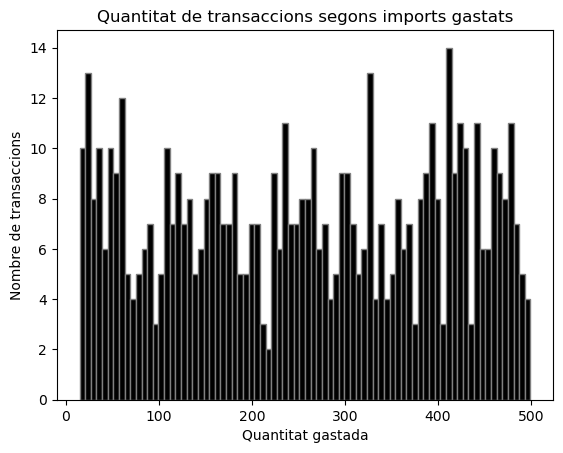

In [244]:
plt.hist(df_1['amount'], bins=80, color='black', edgecolor='grey')
plt.title('Quantitat de transaccions segons imports gastats')
plt.xlabel('Quantitat gastada')
plt.ylabel('Nombre de transaccions')
plt.show()

1. Distribución Homogénea: Los importes gastados se distribuyen de manera relativamente homogénea entre 0 y 500 unidades. No hay una tendencia clara hacia una cantidad específica.

2. Picos Notables: Hay varios picos en la cantidad de transacciones, alcanzando hasta 14 transacciones en algunos casos, lo que indica que ciertos importes son más comunes.

3. Consistencia General: A pesar de la variabilidad, la cantidad de transacciones por importes no parece decrecer significativamente a medida que aumenta el importe gastado. Esto sugiere que las transacciones grandes son tan frecuentes como las pequeñas.

En resumen, el gráfico revela que las transacciones están distribuidas de manera bastante uniforme en términos de cantidad gastada, con algunos picos que indican importes más comunes. Esto podría sugerir una distribución diversificada de los gastos en el conjunto de datos.

## Ex 2: Dues variables numèriques

Query de Mysql:

In [246]:
df_2 = pd.read_sql("""SELECT products.price, TIMESTAMPDIFF(YEAR, STR_TO_DATE(birth_date, '%b %d, %Y'), CURDATE()) AS edat
                 FROM users
                 JOIN transactions ON transactions.user_id = users.id
                 JOIN products ON products.id = transactions.product_ids""", con=db)

/var/folders/xm/w_wtz2nx3y537p9s_f9kdlqm0000gn/T/ipykernel_28018/1216876258.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2 = pd.read_sql("""SELECT products.price, TIMESTAMPDIFF(YEAR, STR_TO_DATE(birth_date, '%b %d, %Y'), CURDATE()) AS edat


In [247]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   110 non-null    object
 1   edat    110 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [248]:
df_2["price"] = df_2["price"].str.replace('$', '').astype(float)

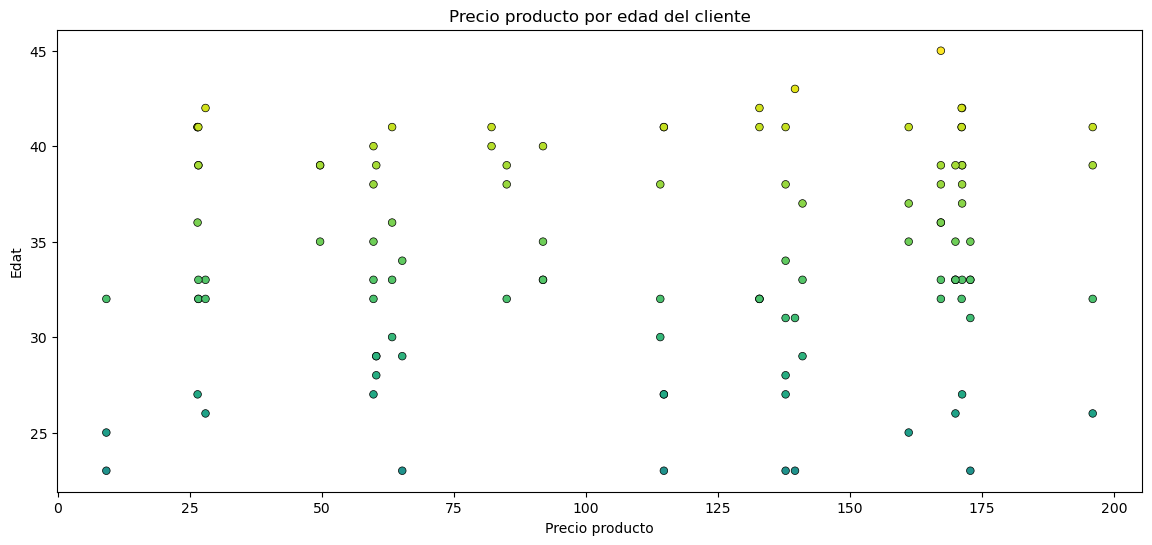

In [249]:
plt.figure(figsize=(14, 6))

colors = plt.cm.viridis(df_2['edat'] / df_2['edat'].max())  # Use the 'viridis' colormap

plt.scatter(df_2['price'], df_2["edat"], s=30, alpha=1, c=colors, edgecolor="black", linewidth=0.5)
plt.title('Precio producto por edad del cliente')
plt.xlabel('Precio producto')
plt.ylabel('Edat')
plt.show()

#### Distribución General:
Los puntos están dispersos a lo largo de una amplia gama de precios (de 0 a 200) y edades (de 20 a 45).
No hay una tendencia clara visible que indique que el precio del producto se asocie directamente con la edad del cliente.

#### Agrupaciones Notables:
Hay algunas concentraciones de puntos en ciertos rangos de precios y edades, por ejemplo, en torno a los precios de 25, 60, 85, 135, y 170.
Estas concentraciones sugieren que ciertos productos en estos rangos de precios son populares entre clientes de diversas edades.

#### Variabilidad por Edad:
Los clientes de todas las edades compran productos en un amplio rango de precios, lo que indica que no hay un patrón específico de consumo de productos basados en la edad en este gráfico.

#### Conclusión:
La gráfica indica una dispersión bastante uniforme sin una correlación clara entre la edad del cliente y el precio del producto. Esto sugiere que, en el conjunto de datos representado, los precios de los productos no están fuertemente influenciados por la edad de los clientes.

## Ex 3: Una variable categòrica.

In [250]:
df_3 = pd.read_sql("""SELECT COUNT(*) as count,
                 CASE WHEN declined = 0 THEN 'Autoritzades' ELSE 'Rebutjades' END AS transaction_status
    FROM sprint4.transactions
    GROUP BY declined""", con=db)


/var/folders/xm/w_wtz2nx3y537p9s_f9kdlqm0000gn/T/ipykernel_28018/190125490.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3 = pd.read_sql("""SELECT COUNT(*) as count,


In [251]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               2 non-null      int64 
 1   transaction_status  2 non-null      object
dtypes: int64(1), object(1)
memory usage: 164.0+ bytes


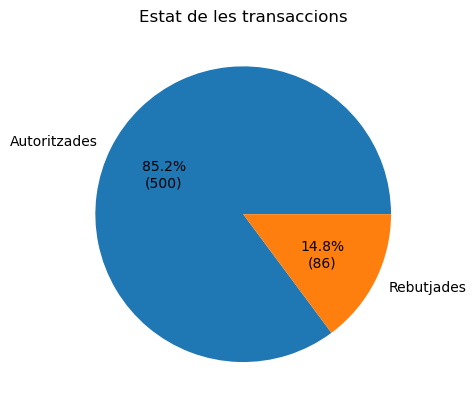

In [253]:
# Visualization (consider pie chart or bar chart)
def autopct_format(pct):
    return f"{pct:.1f}%\n({int(pct/100 * df_3['count'].sum())})"  # Adjust format as needed

# Visualization
plt.pie(df_3['count'], labels=df_3['transaction_status'], autopct=autopct_format)  # Adjust fontsize
plt.title('Estat de les transaccions')

# Show the plot
plt.show()


#### Distribución de las Transacciones:
La mayoría de las transacciones son autorizadas, representando el 85.2% del total, que corresponde a 500 transacciones.
Una menor proporción de transacciones, el 14.8%, son rechazadas, lo que corresponde a 86 transacciones.

#### Porcentaje y Cantidad:
El gráfico no solo muestra los porcentajes, sino también el número absoluto de transacciones en cada categoría, proporcionando una visión clara tanto de la proporción como del volumen de transacciones.

#### Estado Mayoritario:
Las transacciones autorizadas constituyen la mayoría abrumadora, lo que sugiere que el sistema o el proceso para autorizar transacciones es eficiente y funciona bien para la mayoría de los casos.

#### Transacciones Rechazadas:
Aunque las transacciones rechazadas son una minoría, aún representan una parte significativa (casi el 15%) del total, lo cual podría indicar áreas potenciales de mejora en el proceso de autorización o podría reflejar criterios estrictos de aprobación.

#### Conclusión:
El gráfico de pastel ilustra de manera clara y concisa que la mayoría de las transacciones (85.2%) son autorizadas, mientras que una minoría (14.8%) son rechazadas. Este desglose puede ser útil para evaluar el rendimiento del sistema de transacciones y para identificar áreas donde se podrían realizar mejoras, especialmente en la reducción del número de transacciones rechazadas.

## Ex 4: Una variable categòrica i una numèrica.

In [254]:
df_4 = pd.read_sql("""SELECT amount, timestamp
                    FROM sprint4.transactions""", con=db)

/var/folders/xm/w_wtz2nx3y537p9s_f9kdlqm0000gn/T/ipykernel_28018/2676497703.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4 = pd.read_sql("""SELECT amount, timestamp


In [255]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   amount     587 non-null    float64
 1   timestamp  587 non-null    object 
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [257]:
df_4['timestamp'] = pd.to_datetime(df_4['timestamp'])

#df['month'] = df['timestamp'].dt.month

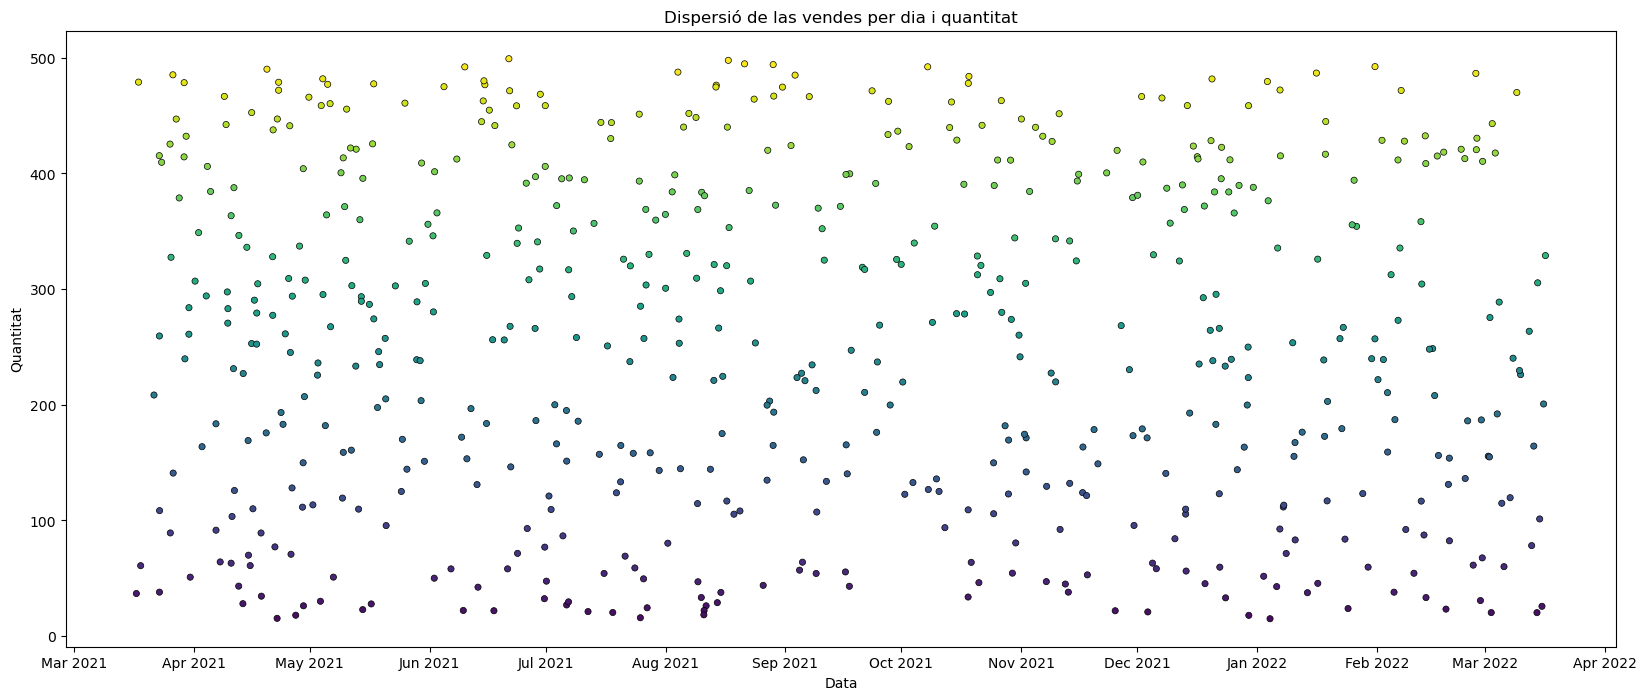

In [258]:
plt.figure(figsize=(20, 8))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator()) # intervalo de 1 mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # formato 'Mes Año'

colors = plt.cm.viridis(df_4['amount'] / df_4['amount'].max())

plt.scatter(df_4['timestamp'], df_4["amount"], s=20, alpha=1, c=colors, edgecolor="black", linewidth=0.5)
plt.title('Dispersió de las vendes per dia i quantitat')
plt.xlabel('Data')  
plt.ylabel('Quantitat')

plt.show()


#### Distribución Temporal:
Las ventas están distribuidas de manera continua a lo largo del tiempo, sin grandes interrupciones.
No se observan picos significativos o caídas abruptas en las ventas en ninguna fecha específica.

#### Rango de Ventas:
La cantidad de ventas diarias varía ampliamente, desde valores cercanos a 0 hasta alrededor de 500.

#### Patrones Estacionales:
No se observan patrones estacionales claros en las ventas; la dispersión de los puntos parece bastante uniforme a lo largo del año.
Sin embargo, hay una ligera tendencia a que las ventas sean más altas durante ciertos meses, aunque esta no es muy pronunciada.

#### Constancia en las Ventas:
Hay una constancia notable en la cantidad de ventas altas (450-500) durante todo el periodo, lo que sugiere un grupo constante de días con muy buenas ventas.
Las ventas en el rango más bajo (0-100) también son consistentes, indicando que hay días con bajas ventas distribuidos uniformemente.

#### Conclusión:
El gráfico sugiere una estabilidad general en la cantidad de ventas diarias a lo largo del año, sin variaciones estacionales o eventos específicos que alteren significativamente las ventas. La dispersión uniforme de los puntos indica que las ventas se mantienen en un rango constante, con días específicos de muy buenas y muy bajas ventas distribuidos a lo largo del tiempo.

## Ex 5: Dues variables categòriques.

In [290]:
df_5 = pd.read_sql("""SELECT u.country, 
                        COUNT(DISTINCT t.user_id) AS num_users_with_orders,
                        COUNT(DISTINCT u.id) - COUNT(DISTINCT t.user_id) AS num_users_without_orders
                    FROM sprint4.users u
                    LEFT JOIN sprint4.transactions t ON u.id = t.user_id
                    GROUP BY u.country;""", con=db)

/var/folders/xm/w_wtz2nx3y537p9s_f9kdlqm0000gn/T/ipykernel_28018/3164173211.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5 = pd.read_sql("""SELECT u.country,


In [291]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   country                   3 non-null      object
 1   num_users_with_orders     3 non-null      int64 
 2   num_users_without_orders  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


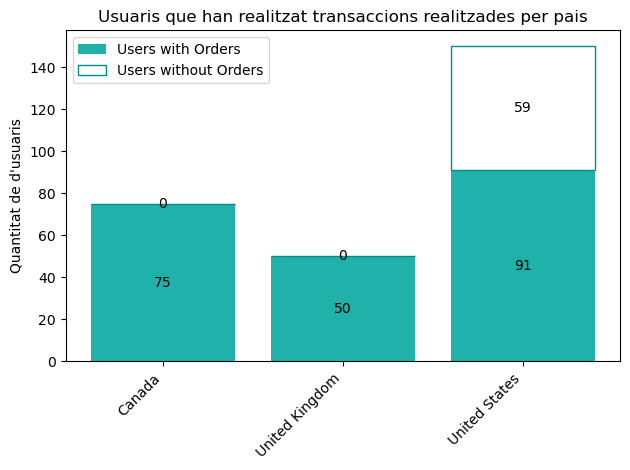

In [326]:
plt.bar(df_5['country'], df_5['num_users_with_orders'], label='Users with Orders', color='lightseagreen')
plt.bar(df_5['country'], df_5['num_users_without_orders'], bottom=df_5['num_users_with_orders'], label='Users without Orders', color='white', edgecolor='darkcyan')
plt.ylabel("Quantitat de d'usuaris")
plt.title('Usuaris que han realitzat transaccions realitzades per pais')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()

for i, (with_order, without_order) in enumerate(zip(df_5['num_users_with_orders'], df_5['num_users_without_orders'])):
    plt.text(i, with_order / 2, str(with_order), ha='center', va='center', color='black')
    plt.text(i, with_order + (without_order / 2), str(without_order), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()



#### Interpretación:
##### Canadá y Reino Unido:
Todos los usuarios han realizado pedidos, no hay usuarios sin pedidos.

##### Estados Unidos:
Hay una diferencia notable, con 91 usuarios que han realizado pedidos y 59 usuarios que no lo han hecho. Esto indica una proporción significativa de usuarios que no han realizado transacciones en comparación con Canadá y Reino Unido.

#### Conclusión:
La participación en transacciones varía significativamente entre los países. Canadá y Reino Unido tienen una alta tasa de usuarios que realizan pedidos, mientras que en Estados Unidos hay una considerable cantidad de usuarios que no han realizado ningún pedido. Esta información puede ser útil para entender el comportamiento de los usuarios y potencialmente ajustar estrategias de marketing o servicio al cliente en cada región.

## Ex 6: Tres variables

In [349]:
df_6 = pd.read_sql("""SELECT COUNT(t.id) AS transaction_count, u.country, EXTRACT(YEAR FROM t.timestamp) AS timestamp
                    FROM sprint4.transactions t
                    JOIN sprint4.users u ON t.user_id = u.id
                    GROUP BY u.country, EXTRACT(YEAR FROM t.timestamp);""", con=db)

/var/folders/xm/w_wtz2nx3y537p9s_f9kdlqm0000gn/T/ipykernel_28018/3964287870.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6 = pd.read_sql("""SELECT COUNT(t.id) AS transaction_count, u.country, EXTRACT(YEAR FROM t.timestamp) AS timestamp


In [350]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_count  6 non-null      int64 
 1   country            6 non-null      object
 2   timestamp          6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 276.0+ bytes


In [351]:
df_6

,transaction_count,country,timestamp
0,287,Canada,2021
1,65,Canada,2022
2,48,United Kingdom,2021
3,14,United Kingdom,2022
4,144,United States,2021
5,29,United States,2022


In [347]:
df_6['timestamp'] = pd.to_datetime(df_6['timestamp'], unit='D')

df_6['year'] = df_6['timestamp'].dt.year

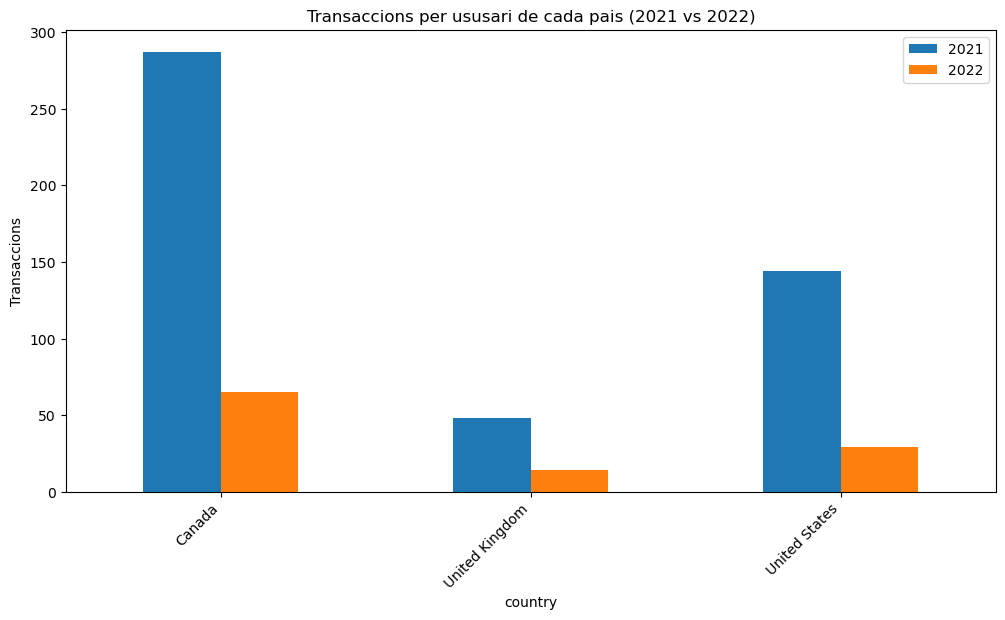

In [384]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the years 2021 and 2022
df_6_2021 = df_6[df_6['timestamp'] == 2021]
df_6_2022 = df_6[df_6['timestamp'] == 2022]

group1_values = df_6_2021.set_index('country')['transaction_count']
group2_values = df_6_2022.set_index('country')['transaction_count']

# Define the width of each bar
bar_width = 0.35


df_6.pivot(index='country', columns='timestamp', values='transaction_count').plot(kind='bar', figsize=(12, 6))

# Adding labels and title
plt.ylabel('Transaccions')
plt.title('Transaccions per ususari de cada pais (2021 vs 2022)')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()


#### Interpretación:
##### Canadá:
2021: Aproximadamente 275 transacciones.
2022: Aproximadamente 50 transacciones.
Hay una notable disminución en el número de transacciones por usuario del 2021 al 2022.

##### Reino Unido:
2021: Aproximadamente 50 transacciones.
2022: Aproximadamente 5 transacciones.
También se observa una disminución significativa en las transacciones por usuario.

##### Estados Unidos:
2021: Aproximadamente 150 transacciones.
2022: Aproximadamente 30 transacciones.
Nuevamente, se ve una reducción considerable en el número de transacciones por usuario entre los dos años.

#### Conclusión:
En todos los países representados (Canadá, Reino Unido y Estados Unidos), el número de transacciones por usuario ha disminuido significativamente de 2021 a 2022. Esta tendencia puede ser indicativa de cambios en el comportamiento de compra, posibles factores económicos, cambios en la plataforma de ventas, entre otros. Es crucial investigar más a fondo las posibles causas detrás de esta disminución para implementar estrategias adecuadas y revertir esta tendencia negativa. También puede ser debido a que el año 2022 no haya finalizado por lo que solo se cuentan las transacciones hasta el mes del análisis.

## Ex 7: Graficar un Pairplot.

In [447]:
df_7 = pd.read_sql("""SELECT transactions.declined, companies.country, products.price, products.colour, products.weight
                 FROM transactions
                 JOIN companies ON companies.company_id = transactions.business_id
                 JOIN products ON transactions.product_ids = products.id
                 JOIN users ON users.id = transactions.user_id;""", con=db)

/var/folders/xm/w_wtz2nx3y537p9s_f9kdlqm0000gn/T/ipykernel_28018/1697396859.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_7 = pd.read_sql("""SELECT transactions.declined, companies.country, products.price, products.colour, products.weight


In [433]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   declined  110 non-null    int64  
 1   country   110 non-null    object 
 2   price     110 non-null    object 
 3   colour    110 non-null    object 
 4   weight    110 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.4+ KB


In [ ]:
df_7["price"] = df_7["price"].str.replace('$', '').astype(float)

df_7["weight"] = df_7["weight"].astype("float64")
df_7["colour"] = df_7["colour"].astype("category")
df_7["price"] = df_7["price"].astype("float64")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


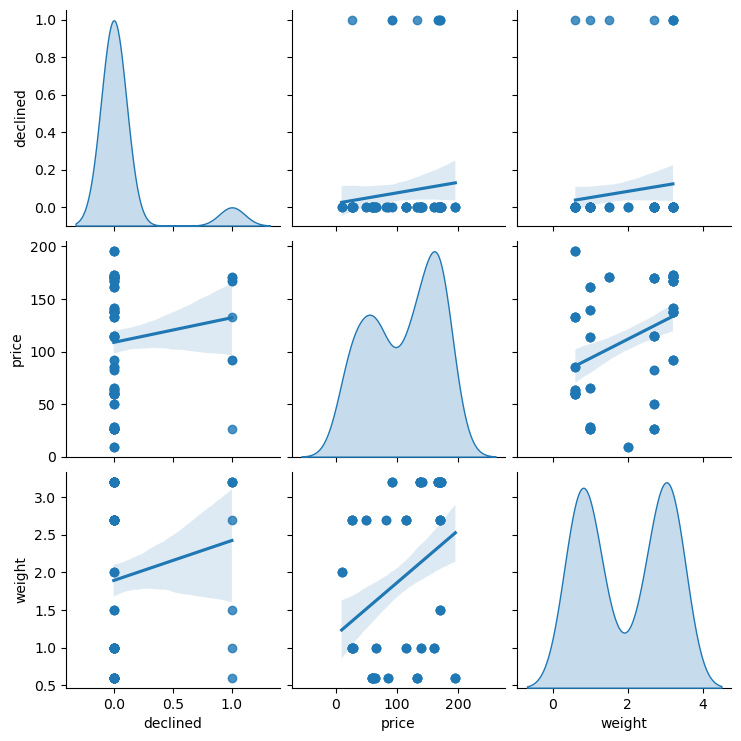

In [445]:
cols_to_plot = ["declined","price","weight"]
sns.pairplot(df_7[cols_to_plot], diag_kind = "kde", kind="reg")
plt.show()

### Interpretación de las relaciones entre variables:
##### Declined vs Price:
Parece haber una ligera tendencia positiva, indicando que a medida que el precio aumenta, la proporción de elementos rechazados también puede aumentar, aunque la relación no es muy fuerte.

##### Declined vs Weight:
La relación muestra una ligera tendencia positiva. Parece que hay una mayor proporción de elementos rechazados a medida que el peso aumenta, aunque esta relación también parece débil.

##### Price vs Weight:
La relación entre precio y peso muestra una tendencia positiva más clara, lo que sugiere que a medida que aumenta el peso, el precio también tiende a aumentar.

----
----
----

### Interpretación de las distribuciones:
##### Declined:
La mayoría de los valores están cerca de 0, indicando que la mayoría de los elementos no son rechazados.
Hay un pequeño pico cerca de 1, sugiriendo que algunos elementos son rechazados.

##### Price:
La distribución del precio parece tener dos picos (bimodal), indicando que hay dos rangos de precios comunes en los datos.

##### Weight:
La distribución del peso también es bimodal, sugiriendo la presencia de dos grupos distintos en términos de peso.

----
----
----

### Conclusión:
Las relaciones entre "declined" y las otras variables (price y weight) muestran tendencias positivas débiles.
Las variables "price" y "weight" tienen una relación positiva más clara.
Las distribuciones de "price" y "weight" son bimodales, lo que puede indicar la existencia de dos categorías o tipos diferentes de productos en los datos.

# NIVELL 2

## Ex 1: Correlació de totes les variables numèriques.

In [451]:
df_01 = pd.read_sql("""SELECT *
                    FROM transactions
                    JOIN products ON products.id = transactions.product_ids 
                    JOIN companies ON companies.company_id = transactions.business_id;""", con=db)

/var/folders/xm/w_wtz2nx3y537p9s_f9kdlqm0000gn/T/ipykernel_28018/3310837258.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_01 = pd.read_sql("SELECT * FROM transactions JOIN products ON products.id = transactions.product_ids JOIN companies ON companies.company_id = transactions.business_id;", con=db)


In [458]:
df_01.info()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,price,colour,weight,warehouse_id,company_id,company_name,phone,email,country,website
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,2021-07-07 17:43:16,293.57,0,59,275,83.783915,-178.860354,...,114.77,#bcbcbc,2.7,WH--54,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,841AC1A0-9CA6-2AF7-EBC2-BC9C77C1EBB8,CcU-3001,b-2258,2021-12-20 02:01:10,428.40,0,47,275,-39.652828,88.791911,...,82.15,#919191,2.7,WH--42,b-2258,Vestibulum Lorem PC,02 02 87 33 40,aenean.massa.integer@aol.net,Belgium,https://pinterest.com/sub/cars
2,D3470F3E-9683-799A-40F1-E42C143BAC5A,CcU-3008,b-2262,2021-11-29 19:06:42,379.14,0,1,275,-62.835963,-17.712668,...,161.11,#7c7c7c,1.0,WH-4,b-2262,Gravida Sagittis LLP,03 81 28 33 97,turpis.vitae@google.ca,Sweden,https://naver.com/site
3,DE684792-5DEE-5E12-D0B5-C5661D48F42A,CcU-3022,b-2270,2021-06-23 17:07:22,71.55,0,59,275,61.227753,13.356226,...,114.77,#bcbcbc,2.7,WH--54,b-2270,Dis Parturient Institute,05 36 29 78 74,purus@protonmail.org,Ireland,https://google.com/one
4,4B3FF0B5-1547-801E-D5B0-44EDB2F62210,CcU-3043,b-2282,2021-12-04 23:00:20,63.12,0,83,275,48.997280,-50.549755,...,26.51,#cccccc,2.7,WH--78,b-2282,Pretium Neque Corp.,07 77 48 55 28,eleifend.nec.malesuada@protonmail.couk,Australia,https://netflix.com/sub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,B529B64A-B491-BDD1-75BD-CC362A009B58,CcU-3232,b-2390,2021-05-14 07:37:39,289.51,1,37,272,16.611197,32.676591,...,26.66,#aaaaaa,1.0,WH--32,b-2390,Neque Tellus Imperdiet Corp.,09 15 42 22 11,vestibulum.ante.ipsum@aol.edu,Ireland,https://whatsapp.com/sub/cars
106,D233A5A4-E618-32AA-B9CB-55C7A8E84359,CcU-3323,b-2442,2021-11-25 07:14:27,21.93,1,17,272,83.661347,-177.433574,...,91.89,#7c7c7c,3.2,WH--12,b-2442,Aliquam Erat Volutpat LLP,06 01 63 57 66,pede.nunc@icloud.net,Italy,https://instagram.com/fr
107,DAB2D839-5B54-901B-6651-995911BFAEEA,CcU-3351,b-2458,2021-06-21 16:18:14,471.54,1,17,272,25.748605,-35.083714,...,91.89,#7c7c7c,3.2,WH--12,b-2458,Eget Tincidunt Dui Institute,05 35 93 32 44,eget.laoreet@hotmail.org,Netherlands,https://wikipedia.org/user/110
108,133B82CC-DE62-8604-2D11-3DC5449E0A5F,CcU-3407,b-2490,2021-04-02 05:17:46,348.88,1,29,271,62.324635,101.016673,...,167.20,#111111,3.2,WH--24,b-2490,Nunc Sit Incorporated,07 28 42 63 63,pede.ultrices@icloud.net,Norway,https://naver.com/en-ca


In [456]:
df_01["price"] = df_01["price"].str.replace('$', '').astype(float)

In [459]:
df_01.isnull().sum()

id              0
card_id         0
business_id     0
timestamp       0
amount          0
declined        0
product_ids     0
user_id         0
lat             0
longitude       0
id              0
product_name    0
price           0
colour          0
weight          0
warehouse_id    0
company_id      0
company_name    0
phone           0
email           0
country         0
website         0
dtype: int64

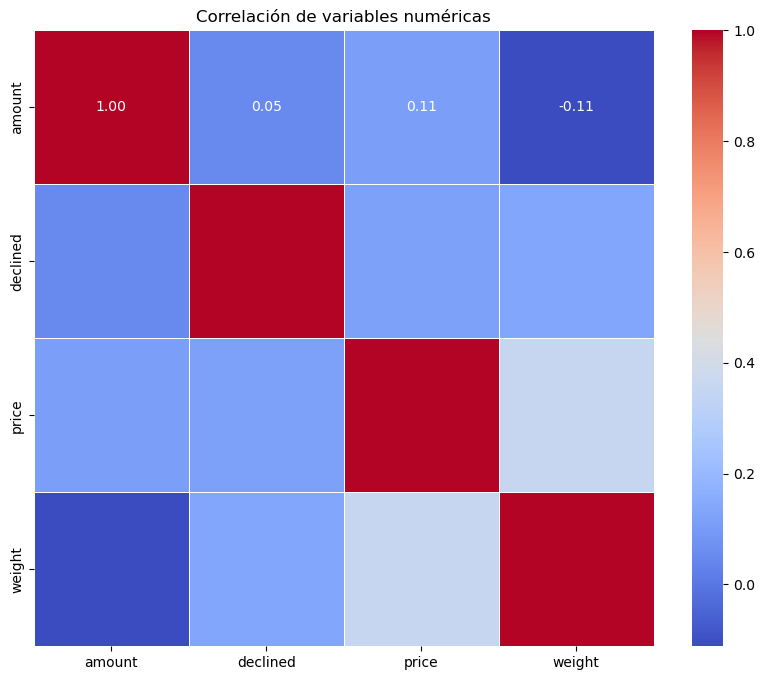

In [457]:
df_01["price"] = df_01["price"].astype("float64")
cols_to_plot = ["amount","declined","price","weight"]
correlation = df_01[cols_to_plot].corr()

# Genera un mapa de calor con la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlación de variables numéricas')
plt.show()